In [4]:
from api_wrappers.kraken_wrapper import KrakenWrapper

wrapper = KrakenWrapper(lb_interval="4hr")

all_assets = wrapper.get_assets("USD")
print(len(all_assets))
for asset in all_assets:
    print(asset + "\n")

498
1INCHUSD

AAVEUSD

ABUSD

ACAUSD

ACHUSD

ACTUSD

ACXUSD

ADAUSD

ADXUSD

AEROUSD

AEVOUSD

AGLDUSD

AI16ZUSD

AI3USD

AIOZUSD

AIRUSD

AIXBTUSD

AKEUSD

AKTUSD

ALCHUSD

ALCXUSD

ALGOUSD

ALICEUSD

ALKIMIUSD

ALPHAUSD

ALTUSD

ANKRUSD

ANLOGUSD

ANONUSD

APENFTUSD

APEUSD

API3USD

APTUSD

APUUSD

ARBUSD

ARCUSD

ARKMUSD

ARPAUSD

ARUSD

ASRRUSD

ASTRUSD

ATHUSD

ATLASUSD

ATOMUSD

AUCTIONUSD

AUDIOUSD

AUDUSD

AURAUSD

AUSD

AVAAIUSD

AVAXUSD

AXSUSD

B3USD

BABYUSD

BADGERUSD

BALUSD

BANANAS31USD

BANDUSD

BATUSD

BCHUSD

BDXNUSD

BEAMUSD

BERAUSD

BICOUSD

BIGTIMEUSD

BIOUSD

BITUSD

BLURUSD

BLZUSD

BMTUSD

BNBUSD

BNCUSD

BNTUSD

BOBAUSD

BODENUSD

BONDUSD

BONKUSD

BRICKUSD

BSXUSD

BTRUSD

BTTUSD

C98USD

CAKEUSD

CAMPUSD

CARVUSD

CATUSD

CCDUSD

CELOUSD

CELRUSD

CFGUSD

CHEEMSUSD

CHEXUSD

CHILLHOUSEUSD

CHRUSD

CHZUSD

CLANKERUSD

CLOUDUSD

CLVUSD

CMETHUSD

COMPUSD

COOKIEUSD

COQUSD

CORNUSD

COTIUSD

COWUSD

CPOOLUSD

CQTUSD

CROUSD

CRVUSD

CSMUSD

CTSIUSD

CVCUSD


In [5]:
hist_dict = wrapper.load_hist_files()

In [6]:
test_key = list(hist_dict.keys())[4]
test_result = hist_dict[test_key]

print(test_result)
for row in test_result:
    print(row)

           date   open   high    low  close   vwap           vol
0    1694390400   9.41   9.50   9.06   9.19   9.23   2256.650783
1    1694476800   9.25   9.57   9.21   9.21   9.39   1049.288491
2    1694563200   9.19   9.44   9.12   9.31   9.25   1391.003770
3    1694649600   9.30   9.46   9.28   9.40   9.35    608.969089
4    1694736000   9.41   9.51   9.22   9.44   9.32   4781.857899
..          ...    ...    ...    ...    ...    ...           ...
716  1756252800  24.01  25.31  23.89  24.59  24.84   5530.737519
717  1756339200  24.49  25.08  24.18  24.89  24.73   6369.648153
718  1756425600  24.94  25.20  23.23  23.56  24.43  18686.146053
719  1756512000  23.40  23.89  23.13  23.73  23.66   1671.261903
720  1756598400  23.82  24.16  23.82  24.06  23.95   3545.798637

[721 rows x 7 columns]
date
open
high
low
close
vwap
vol


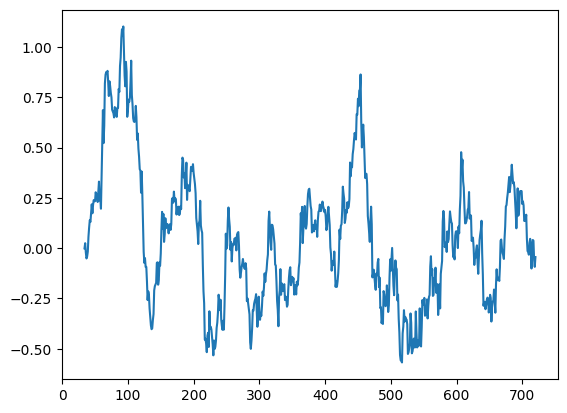

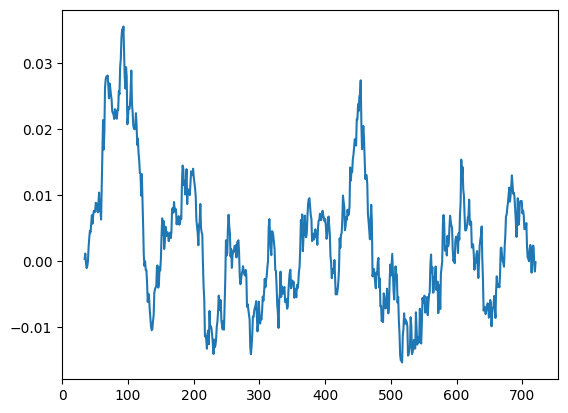

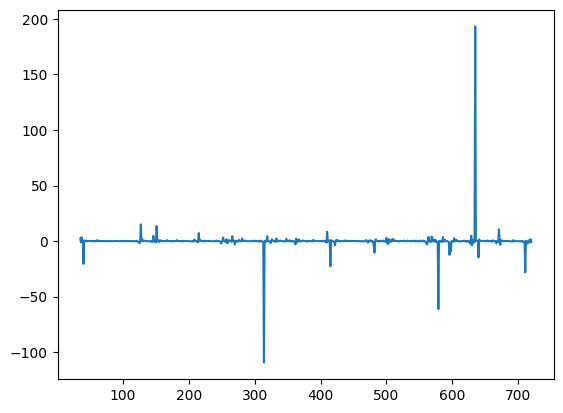

         date  open  high   low  close  vwap          vol  log_return  \
0  1694390400  9.41  9.50  9.06   9.19  9.23  2256.650783         NaN   
1  1694476800  9.25  9.57  9.21   9.21  9.39  1049.288491         NaN   
2  1694563200  9.19  9.44  9.12   9.31  9.25  1391.003770         NaN   
3  1694649600  9.30  9.46  9.28   9.40  9.35   608.969089         NaN   
4  1694736000  9.41  9.51  9.22   9.44  9.32  4781.857899         NaN   

   pct_change  pct_change_pct_change  
0         NaN                    NaN  
1         NaN                    NaN  
2         NaN                    NaN  
3         NaN                    NaN  
4         NaN                    NaN  


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = test_result
df['log_return'] = np.log(df['close']).diff(34)
df['pct_change'] = df['close'].pct_change().rolling(34).mean()
plt.plot(df['log_return'])
plt.show()
plt.plot(df['pct_change'])
plt.show()

df["pct_change_pct_change"] = df["pct_change"].pct_change()
plt.plot(df["pct_change_pct_change"])
plt.show()
print(df.head())

AVAXUSDT.txt
Standard Deviation: 0.049352297021865776
Variance: 0.002435649221334462
Mean: 0.0007781417216696917


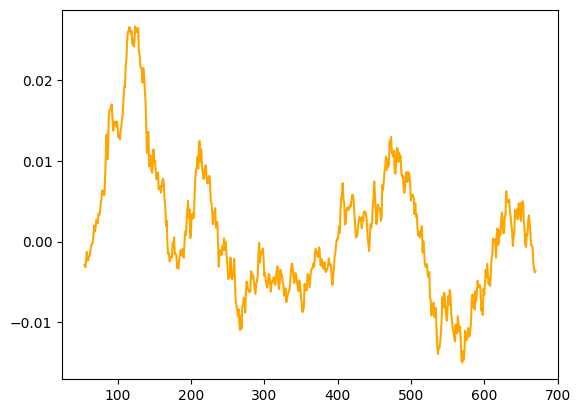

In [9]:
import numpy as np
import matplotlib.pyplot as plt
df['close'] = pd.to_numeric(df['close'], errors='coerce')
log_returns = np.log(df['close'][:-50]).diff().dropna()
print(test_key)
plt.plot(log_returns.rolling(55).mean(), label='Rolling Mean (21 days)', color='orange')
print("Standard Deviation:", log_returns.std())
print("Variance:", log_returns.var())
#plt.plot(df['close'], label='Close Price', color='blue')
print("Mean:", log_returns.mean())

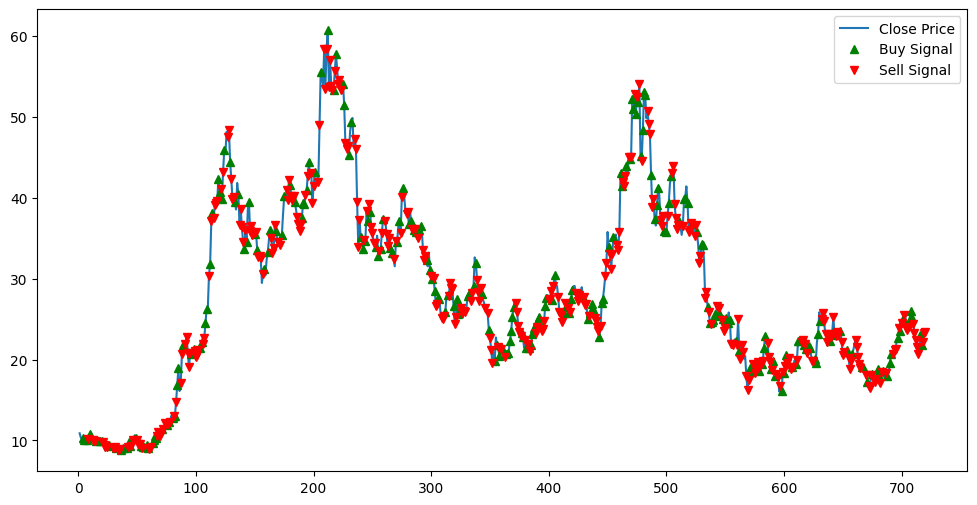

In [10]:
# Calculate log returns
log_returns = np.log(df['close']).diff()

# Align log_returns with df by shifting (since .diff() loses the first row)
df = df.iloc[1:].copy()
log_returns = log_returns.iloc[1:]  # Remove the first NaN after diff

# Buy signal: log return below 0
df['Signal'] = 0
df.loc[(log_returns.shift(1) < log_returns), 'Signal'] = 1

# Sell signal: two consecutive days of log return below 0
sell_mask = (log_returns.shift(3) > log_returns)
df.loc[sell_mask, 'Signal'] = -1

# Optional: Shift signals to avoid lookahead bias
df['Signal'] = df['Signal'].shift(1).fillna(0)

# Plot signals
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Close Price')
plt.plot(df[df['Signal'] == 1].index, df['close'][df['Signal'] == 1], '^', color='g', label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['close'][df['Signal'] == -1], 'v', color='r', label='Sell Signal')
plt.legend()
plt.show()

{'Initial Balance': 10000, 'Final Balance': 11774.645010464215, 'Total Return (%)': 17.746450104642154, 'Max Drawdown (%)': -60.823258699452175, 'Sharpe Ratio': 0.36409517179429535}


c:\Users\nick5\dev\hypercube_ai\ai\treetrader\utils\backtester.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9758.571428571428' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Portfolio'] = balance + (position * df.loc[i, 'close'])


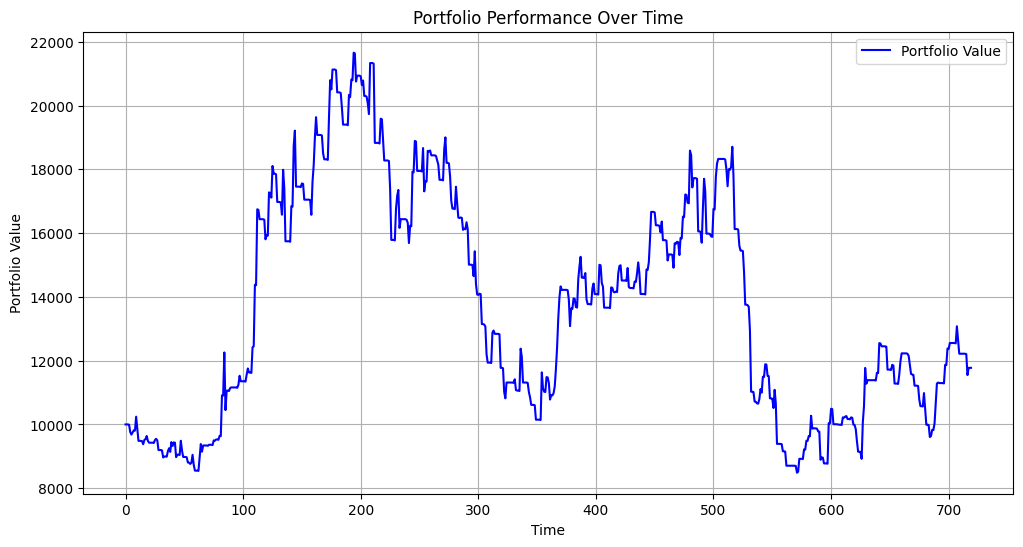

In [12]:
from utils.backtester import Backtester

# Initialize backtester
backtester = Backtester(initial_balance=10000)

df = df.reset_index(drop=True)

# Now run the backtest as usual
result_df = backtester.simple_backtest(df, signal_column='Signal')

# Calculate and print performance metrics
perf = backtester.calculate_performance(result_df)
print(perf)

# Plot portfolio performance
backtester.plot_performance(result_df)

In [13]:
sigma = log_returns.std()

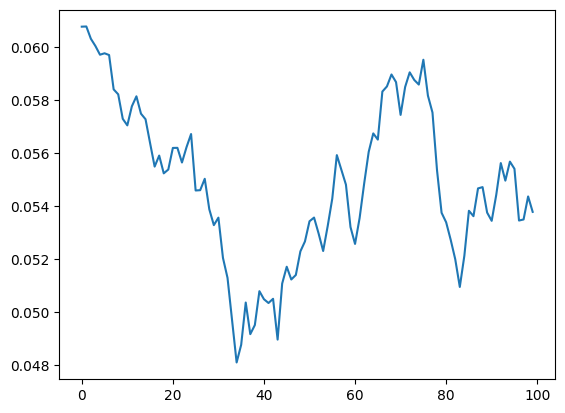

In [28]:
from utils.synthetic_data_service import SyntheticOHLCVGenerator


dg = SyntheticOHLCVGenerator(
    mu=log_returns.mean(),
    sigma=sigma,
    dt=1,  # If your data is daily, dt=1
    n_steps=100,  # Number of data points to generate
    seed=89,  # For reproducibility
    #start_price=df['close'].iloc[-1]  # Start from the last close price
)

test_data = dg.generate(start=df['close'].iloc[-1])
df_test = pd.DataFrame(test_data, columns=bar_data_names)

plt.plot(df_test['close'])



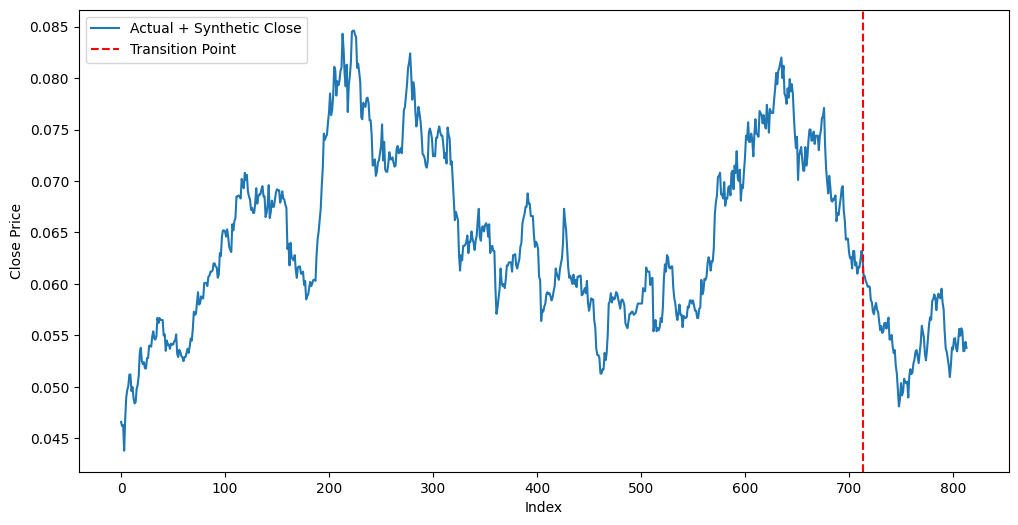

In [29]:
# Ensure both DataFrames have the same columns and index order
df = df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Concatenate real and synthetic data
combined_df = pd.concat([df, df_test], ignore_index=True)

# Plot the combined close prices
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(combined_df['close'], label='Actual + Synthetic Close')
plt.axvline(len(df)-1, color='red', linestyle='--', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

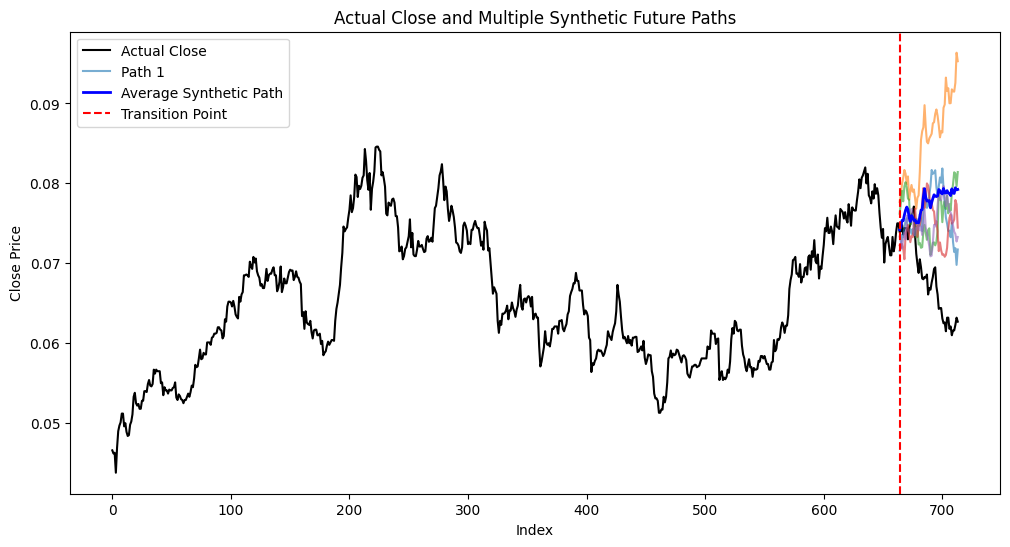

In [34]:
# Number of synthetic paths to generate
#seeds = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210]  # Different seeds for variety
seeds = range(100, 100 + 5)
num_paths = len(seeds)
gen_start = 50  # Start generating synthetic paths from the last 100 points of actual data
synthetic_paths = []

for seed in seeds:
    dg = SyntheticOHLCVGenerator(
        mu=log_returns.mean(),
        sigma=sigma,
        dt=1,
        n_steps=gen_start,
        seed=seed
    )
    test_data = dg.generate(start=df['close'].iloc[-gen_start])
    synthetic_paths.append(test_data['close'].values)

# Plot actual data
plt.figure(figsize=(12, 6))
plt.plot(df['close'], color='black', label='Actual Close')

# Plot all synthetic paths

for i, path in enumerate(synthetic_paths):
    plt.plot(range(len(df)-gen_start, len(df) + len(path)-gen_start), path, alpha=0.6, label=f'Path {i+1}' if i == 0 else None)

# Convert list of arrays to a 2D NumPy array
paths_array = np.array(synthetic_paths)  # shape: (num_paths, n_steps)

# Calculate the average path
avg_path = paths_array.mean(axis=0)
# Plot the average synthetic path
plt.plot(range(len(df)-gen_start, len(df) + len(avg_path) - gen_start), avg_path, color='blue', linewidth=2, label='Average Synthetic Path')


plt.axvline(len(df)-gen_start, color='red', linestyle='--', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual Close and Multiple Synthetic Future Paths')
plt.show()